In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={'figure.figsize':(20,19)})

### Adult датасет
https://www.kaggle.com/wenruliu/adult-income-dataset  
Бинарная классификация, нужно предсказать зарабатывает ли человек более 50 тысяч долларов
Этот датасет - выборка из базы данных перепеси населения в 1994 году

In [2]:
data_raw = pd.read_csv("data/kaggle/adult.csv", na_values=['?'])
data_raw.shape

(48842, 15)

### Описание признаков

- age - возраст опрашиваемого
- workclass - к какому рабочему классу принаджит опрашиваемый
- fnlwgt - количество людей в оригинальной перепеси с такими параметрами
- education - какое образование у человека
- education-num - образование пронумерованное по порядку
- marital-status - семейный статус человека
- occupation - сфера работы человека
- relationship - кем является в семье
- race - раса
- sex - пол
- capital-gain - прирост капитала
- capital-loss - убыток капитала
- hours-per-week - сколько часов человек работает в неделю
- native-country - страна

In [3]:
data_raw.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Представим колонки `income` и `sex` в бинарном виде.  
Уберём `education`, она повторяет колонку `education-num`.

In [4]:
data_raw['income'] = pd.factorize(data_raw['income'])[0]
data_raw['gender']   = pd.factorize(data_raw['gender'])[0]
data_raw = data_raw.drop(['education'], axis=1)

In [5]:
data_raw['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

Практически все люди датасета относятся к Соединённым Штатам, отнесём их всех в одно значение признака `not_USA`

In [6]:
data_raw.loc[data_raw["native-country"] != "United-States", "native-country"] = "not_USA"

In [7]:
data_raw.head(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,1,0,0,30,United-States,0
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,0,0,0,30,United-States,0
6,29,NaN,227026,9,Never-married,NaN,Unmarried,Black,0,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,0,3103,0,32,United-States,1
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,1,0,0,40,United-States,0
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,0,0,0,10,United-States,0


In [8]:
data_raw['native-country'] = pd.factorize(data_raw['native-country'])[0]

In [9]:
data_raw.isna().sum()

age                   0
workclass          2799
fnlwgt                0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

Пропущенные значения есть в колонках со сферой работы и рабочим классом, при чём если не указан рабочий класс, значит скорее всего не будет указана сфера работы
  
заменим такие строки с двумя пропущенными значениями на такие же строки, только вместо `NaN` поставим `Other`

In [10]:
data_raw.loc[[(x[0] and x[1]) for x in zip(data_raw["workclass"].isna(), data_raw["occupation"].isna())], ("workclass", "occupation")] = "Other"

In [11]:
data_raw.isna().sum()

age                 0
workclass           0
fnlwgt              0
educational-num     0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
dtype: int64

остальные строки уберём из рассмотрения

In [12]:
data_raw = data_raw.dropna()

Text(0, 0.5, 'educational-num')

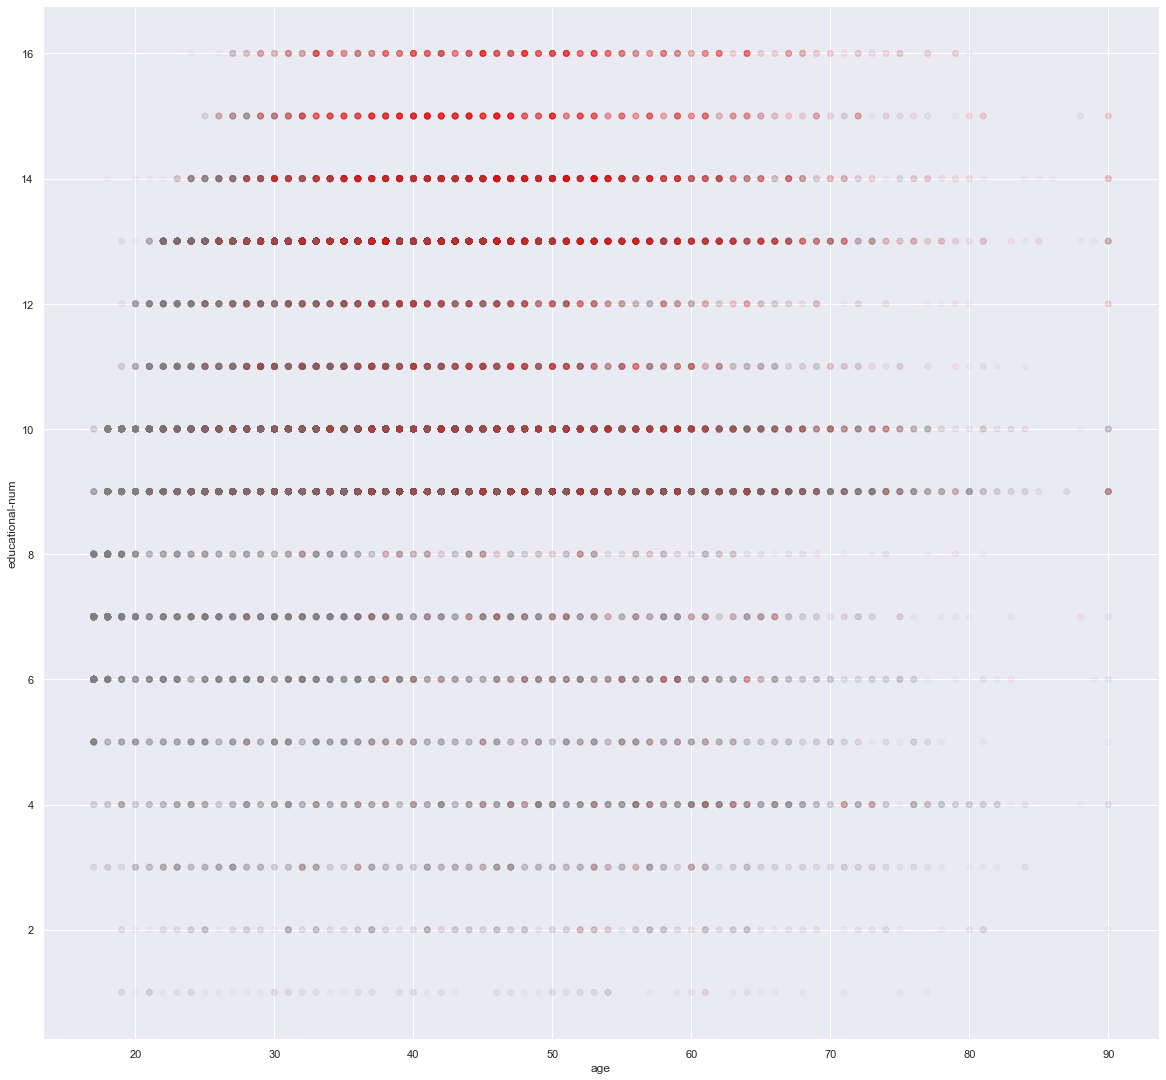

In [13]:
plt.scatter(data_raw['age'], data_raw['educational-num'], color = np.array(('gray', 'red'))[data_raw['income']], alpha = 0.05)
plt.xlabel('age')
plt.ylabel('educational-num')

из диаргаммы рассеяния видно, что молодых людей с высоким образованием меньше, чем людей среднего возраста
Странно, что в опросе участвовало много людей в возрасте 90 лет

In [14]:
data_raw['age'].value_counts().sort_index()

17     593
18     858
19    1053
20    1111
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Name: age, Length: 74, dtype: int64

узнаем распределение количества людей по возрасту

C:\Users\Pavel\miniconda3\envs\ML1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


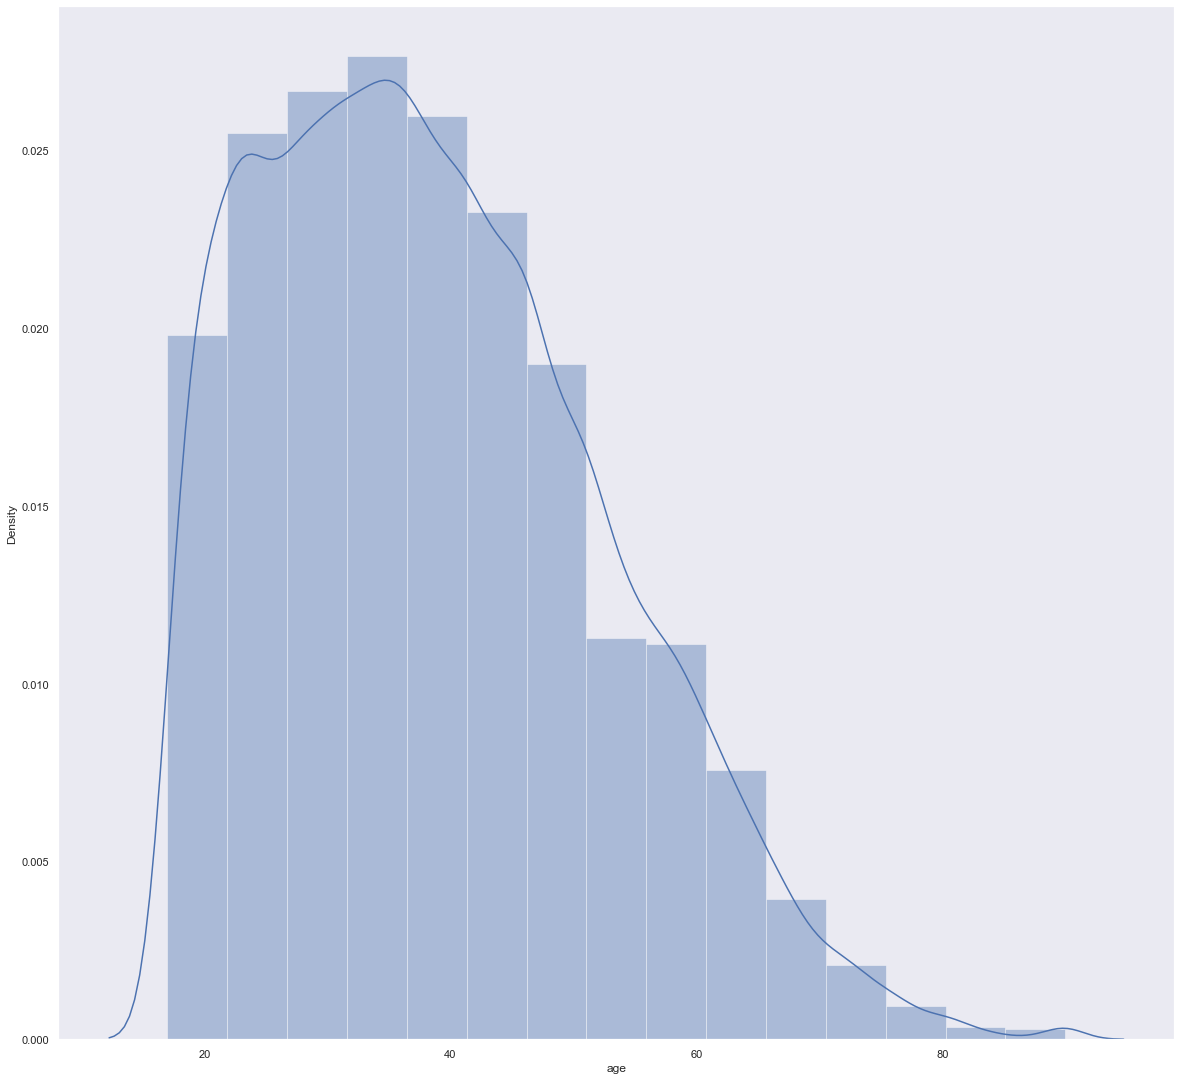

In [15]:
sns.distplot(data_raw['age'], bins=15)
plt.grid()

Избавимся от категориальных признаков с помощью OneHotEncoder, когда каждому категориальному значению соответствует свой признак

In [16]:
data_raw['workclass'] = data_raw['workclass'].astype('category')
data_raw['marital-status'] = data_raw['marital-status'].astype('category')
data_raw['occupation'] = data_raw['occupation'].astype('category')
data_raw['relationship'] = data_raw['relationship'].astype('category')
data_raw['race'] = data_raw['race'].astype('category')

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_for_ohe = data_raw[['workclass', 'marital-status', 'occupation', 'relationship', 'race']]
enc.fit(X_for_ohe)

print(enc.categories_)


ohe_df = enc.transform(X_for_ohe).toarray()
names = enc.get_feature_names_out(['workclass', 'marital-status', 'occupation', 'relationship', 'race'])
ohe_df = pd.DataFrame(ohe_df, columns=names)


print(enc.get_feature_names_out(['workclass', 'marital-status', 'occupation', 'relationship', 'race']))

[array(['Federal-gov', 'Local-gov', 'Other', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object), array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object), array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object), array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object), array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
       'White'], dtype=object)]
['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Other'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pa

In [18]:
ohe_df

,workclass_Federal-gov,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48829,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
48830,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
data = data_raw.drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race'] , axis=1)

In [20]:
data = data.reset_index(drop=True)

In [21]:
X = pd.concat([data, ohe_df], axis = 1)

In [22]:
X

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,0,0,0,40,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,0,50,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,336951,12,0,0,0,40,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,160323,10,0,7688,0,40,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,1,0,0,30,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,27,257302,12,1,0,0,38,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48828,40,154374,9,0,0,0,40,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48829,58,151910,9,1,0,0,40,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
48830,22,201490,9,0,0,0,20,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

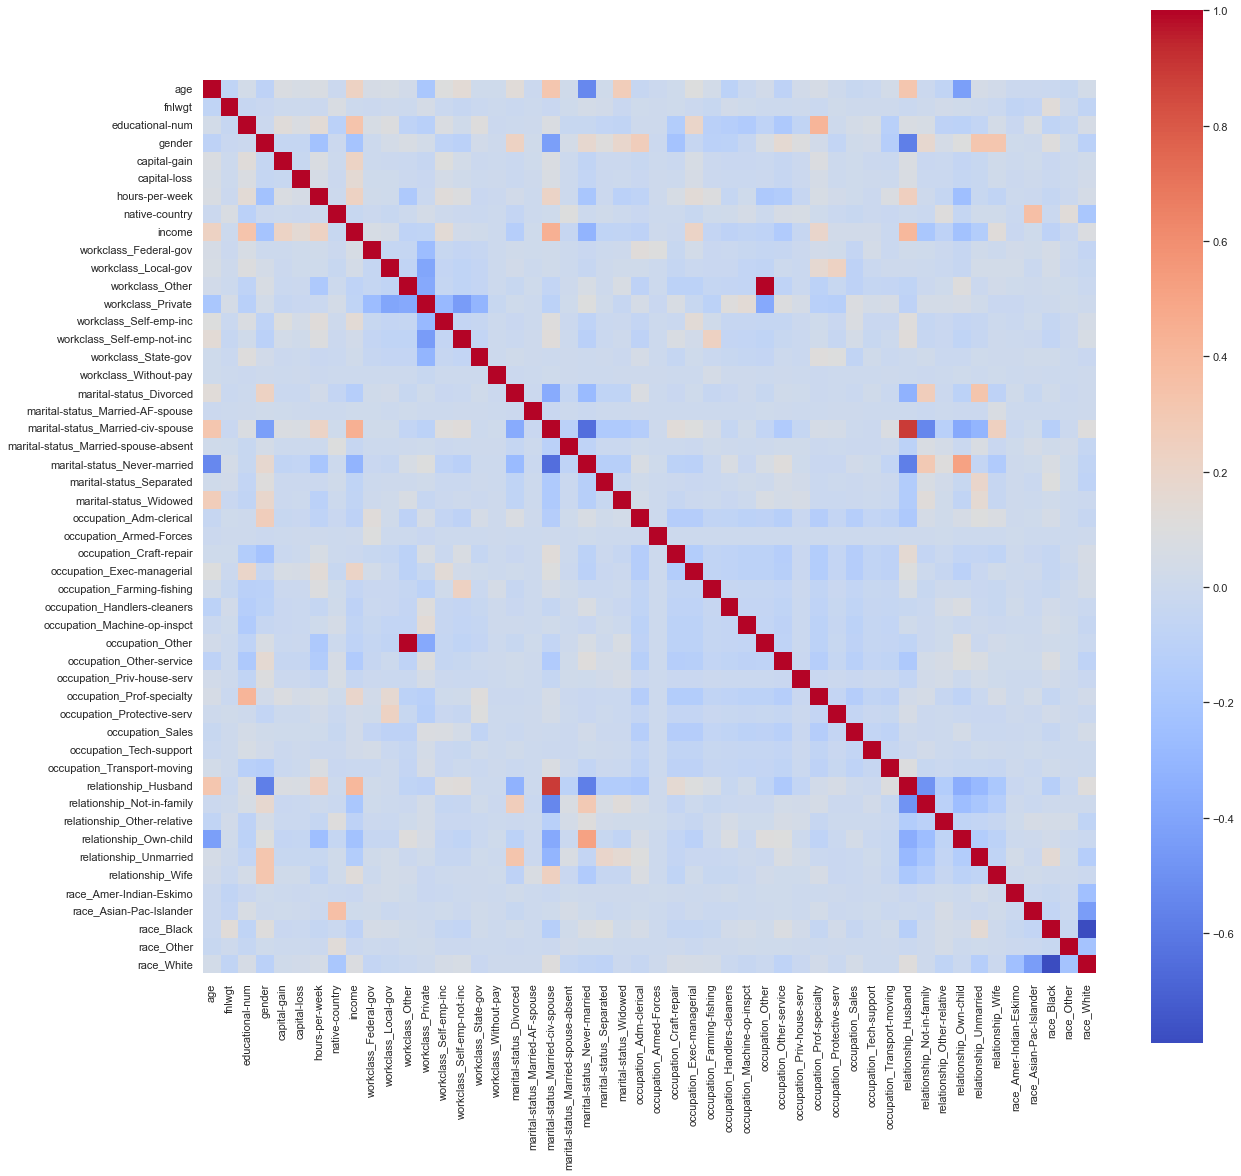

In [23]:
corr_mat = X.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [24]:
corr_mat.to_numpy()[8]

array([ 0.23026573, -0.006312  ,  0.33256068, -0.21466356,  0.22300405,
        0.14753501,  0.22763081, -0.03259151,  1.        ,  0.06209445,
        0.03454767, -0.08359886, -0.07581836,  0.13957945,  0.02715734,
        0.01359572, -0.0070048 , -0.12836137,  0.00897387,  0.44582445,
       -0.03924604, -0.31875284, -0.07360629, -0.06507311, -0.08651994,
        0.00386191, -0.0115729 ,  0.21090461, -0.05123489, -0.08521662,
       -0.06996827, -0.08359886, -0.15529968, -0.03753503,  0.18875799,
        0.02485708,  0.02393732,  0.02093153, -0.01850948,  0.40373773,
       -0.19043135, -0.08558597, -0.22561441, -0.14368772,  0.12054089,
       -0.02825919,  0.01256696, -0.09039821, -0.02493163,  0.08367797])

In [25]:
corr_mat.to_numpy()[8].sort()
corr_mat.to_numpy()[8][-2], corr_mat.to_numpy()[8][0]

(0.44582444916781433, -0.31875284350469124)

Целевая колонка достаточно плохо коррелирует с другими признаками. Максимальная корреляция `0.4458` достигается с колонкой `marital-status_Married-civ-spouse`, максимальная обратная корреляция `-0.3188` с колонкой `marital-status_Never-married`  
   
Уберём колонку `fnlwgt`, так как не участвует в описании человека.

In [26]:
X = X.drop(['fnlwgt'], axis=1)
y = X['income']
X = X.drop(['income'], axis=1)

Разбиение на тестовую и тренинговую выборку

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_x = StandardScaler()
#scaler_y = StandardScaler()

scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#scaler_y.fit(y_train.reshape(-1, 1))
#y_train = scaler_y.transform(y_train.reshape(-1, 1)).ravel()
#y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39065, 48), (9767, 48), (39065,), (9767,))

In [30]:
x_train

array([[ 1.2040714 , -1.98205614,  1.42649287, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [ 1.79093506,  1.13739325, -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [ 0.03034407, -0.42233145, -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       ...,
       [-1.29009917, -0.03240027, -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [ 0.54384978, -0.03240027, -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [ 0.98399752, -1.59212497,  1.42649287, ...,  3.06334853,
        -0.09102282, -2.42688498]])

In [31]:
x_test

array([[ 0.83728161, -0.42233145, -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [-1.36345712, -0.03240027,  1.42649287, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [-1.07002529, -2.37198732, -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       ...,
       [ 1.27742936,  0.74746208,  1.42649287, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [-0.55651959,  0.3575309 , -0.70101998, ..., -0.32644017,
        -0.09102282,  0.41205084],
       [ 0.17705999,  1.13739325,  1.42649287, ..., -0.32644017,
        -0.09102282, -2.42688498]])

In [32]:
y_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### KNeighborsClassifier

Лучшая точность на тестовой выборке: 0.8386403194430224
При k = : 32


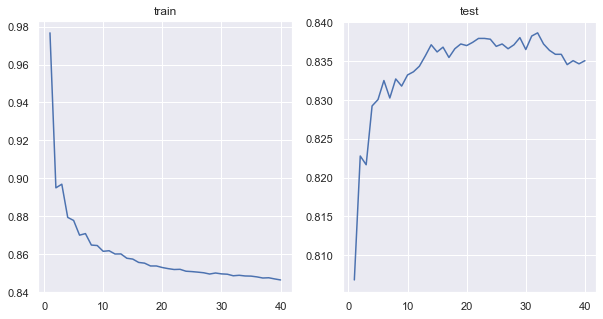

In [34]:
from sklearn.neighbors import KNeighborsClassifier

min_k = 1
max_k = 40
scores_train = []
scores_test = []
for k in range(min_k, max_k + 1):
    knc = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knc.fit(x_train, y_train)
    scores_train.append(knc.score(x_train,y_train))
    scores_test.append(knc.score(x_test,y_test))

#plt.plot(range(min_k,max_k + 1),scores_train)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

print(f"Лучшая точность на тестовой выборке: {max(scores_test)}")
print(f"При k = : {scores_test.index(max(scores_test)) + min_k}")

ax[0].set_title("train")
ax[0].plot(range(min_k,max_k + 1),scores_train)
ax[1].set_title("test")
ax[1].plot(range(min_k,max_k + 1),scores_test)
ax[0].grid(True)
ax[1].grid(True)
plt.show()

Классификатор показал нормальную точность на тестовом наборе данных в 83%